In [88]:
import plot
import btag
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import importlib

In [4]:
importlib.reload(plot)

/eos/home-l/llayer/cmsopen/columnar/btag.py:13: RuntimeWarning: invalid value encountered in true_divide
  eff = np.divide(num[0], denom[0])


<module 'plot' from '/eos/home-l/llayer/cmsopen/columnar/plot.py'>

## Efficiencies

In [73]:
effs, xedges, yedges = btag.load_eff_maps('data/beff.root')

/eos/home-l/llayer/cmsopen/columnar/btag.py:13: RuntimeWarning: invalid value encountered in true_divide
  eff = np.divide(num[0], denom[0])


In [117]:
plt.rcParams.update({'font.size': 22})

def plot_beff(eff, xedges, yedges, title = "Flavour b"):

    eff[eff == 0] = np.nan
    
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    #print np.max(eff)
        
    fig, ax = plt.subplots(figsize=(10, 6))
    #plt.clf()
    #plt.tight_layout()
    #plt.figure(figsize=(8,6))
    im = ax.imshow(eff.T, extent=extent, cmap='plasma', aspect='auto', origin='lower')
    plt.xlabel(r'$p_\mathrm{T}$')
    plt.ylabel(r'$\eta$')
    # Add a colorbar
    #im = ax.imshow(eff, interpolation='nearest')
    fig.colorbar(im, ax=ax)
    plt.title(title)
    plt.show()

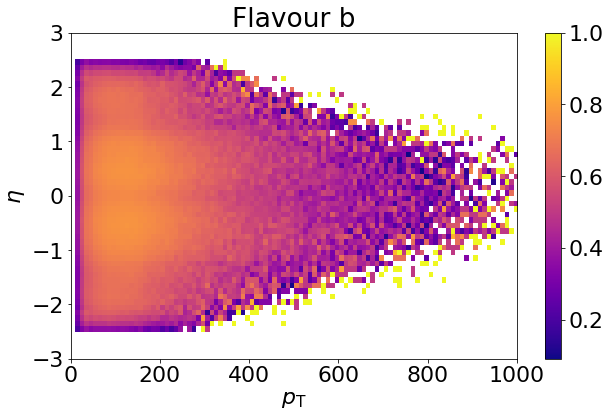

In [118]:
plot_beff(effs["b"], xedges, yedges, title = "Flavour b")

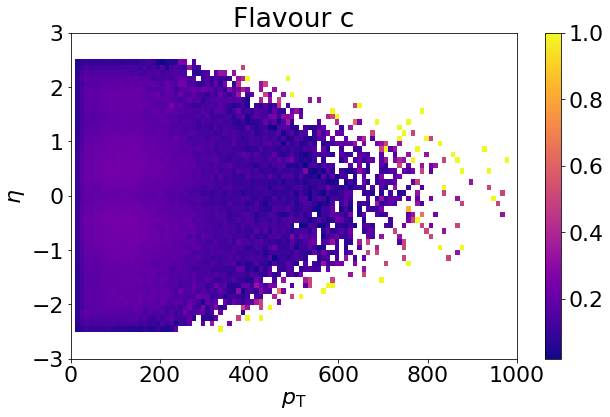

In [119]:
plot_beff(effs["c"], xedges, yedges, title = "Flavour c")

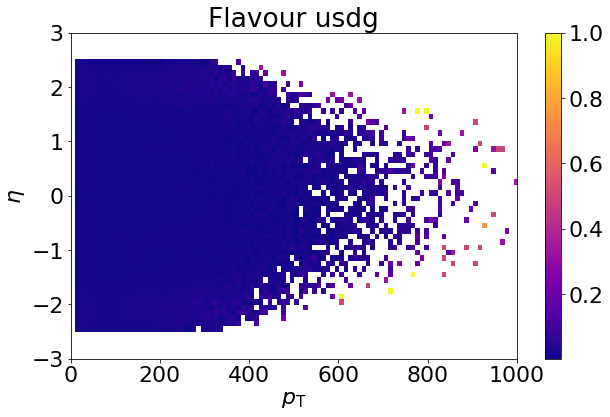

In [120]:
plot_beff(effs["usdg"], xedges, yedges, title = "Flavour usdg")

## B-tagging weights

In [5]:
plot.plot_btag_weights()

/eos/home-l/llayer/cmsopen/columnar/plot.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  save_var(tt_at_least_1tag, "TTJets_1tag", var["var_name"], var["bins"], var["xlow"], var["xup"])
/eos/home-l/llayer/cmsopen/columnar/plot.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  save_var(tt_at_least_1tag, "TTJets_1tag_weighted", var["var_name"], var["bins"], var["xlow"], var["xup"])
/eos/home-l/llayer/cmsopen/columnar/plot.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [6]:
import ROOT

In [7]:
ff = ROOT.TFile("histos/btag.root")

In [8]:
ff.ls()

TFile**		histos/btag.root	
 TFile*		histos/btag.root	
  KEY: TH1D	TTJets_1tag_MET_met;1	TTJets_1tag_MET_met
  KEY: TH1D	TTJets_1tag_weighted_MET_met;1	TTJets_1tag_weighted_MET_met
  KEY: TH1D	TTJets_proba_weight_MET_met;1	TTJets_proba_weight_MET_met
  KEY: TH1D	Jet_btag_weight1_weight;1	Jet_btag_weight1_weight
  KEY: TH1D	Jet_btag_weight2_weight;1	Jet_btag_weight2_weight
  KEY: TH1D	QCD_unweighted_MET_met;1	QCD_unweighted_MET_met
  KEY: TH1D	QCD_mistag_weight_MET_met;1	QCD_mistag_weight_MET_met
  KEY: TH1D	QCD_mistag_weight_weight;1	QCD_mistag_weight_weight


In [10]:
def get_hist(name, norm = False):
    h = ff.Get( name )
    if norm:
        h.Scale(1/h.Integral())
    return h

## B-tag weights for MC

In [57]:
h_TTJets_1tag_MET_met = get_hist("TTJets_1tag_MET_met")
h_TTJets_1tag_weighted_MET_met = get_hist("TTJets_1tag_weighted_MET_met")
h_TTJets_proba_weight_MET_met = get_hist("TTJets_proba_weight_MET_met")

c = ROOT.TCanvas()
ROOT.gStyle.SetOptStat(0)
h_TTJets_1tag_MET_met.Draw()
h_TTJets_1tag_weighted_MET_met.Draw("SAME")
h_TTJets_1tag_weighted_MET_met.SetLineColor(ROOT.kRed+2)
h_TTJets_proba_weight_MET_met.Draw("SAME")
h_TTJets_proba_weight_MET_met.SetLineColor(ROOT.kGreen+2)

h_TTJets_1tag_MET_met.SetTitle("B-tagging weights TTJets")
h_TTJets_1tag_MET_met.GetXaxis().SetTitle("MET [GeV]")

leg = ROOT.TLegend(0.6, 0.6, .89, .89);
leg.AddEntry(h_TTJets_1tag_MET_met, "Unweighted", "l");
leg.AddEntry(h_TTJets_1tag_weighted_MET_met, "Event weight", "l");
leg.AddEntry(h_TTJets_proba_weight_MET_met, "Probabilistic weight", "l");
leg.SetBorderSize(0)
leg.Draw("SAME")
#c.SetLogy()

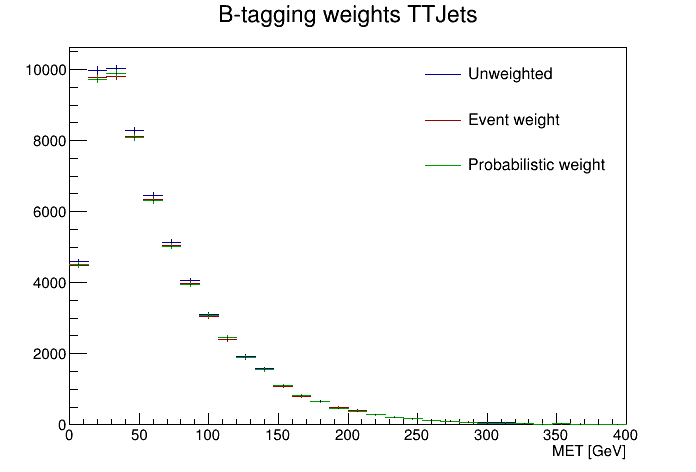

In [59]:
c.Draw()

## QCD weights

In [61]:
h_QCD_unweighted_MET_met = get_hist("QCD_unweighted_MET_met", norm=True)
h_QCD_mistag_weight_MET_met = get_hist("QCD_mistag_weight_MET_met", norm=True)

In [70]:
c2 = ROOT.TCanvas()
h_QCD_unweighted_MET_met.Draw()
h_QCD_unweighted_MET_met.Draw("SAME")
h_QCD_mistag_weight_MET_met.SetLineColor(ROOT.kRed)
h_QCD_mistag_weight_MET_met.Draw("SAME")
c2.SetLogy()
h_QCD_unweighted_MET_met.SetTitle("B-tagging weights QCD")
h_QCD_unweighted_MET_met.GetXaxis().SetTitle("MET [GeV]")

leg = ROOT.TLegend(0.6, 0.7, .89, .89);
leg.AddEntry(h_QCD_unweighted_MET_met, "Unweighted", "l");
leg.AddEntry(h_QCD_mistag_weight_MET_met, "Probabilistic weight", "l");
leg.SetBorderSize(0)
leg.Draw("SAME")

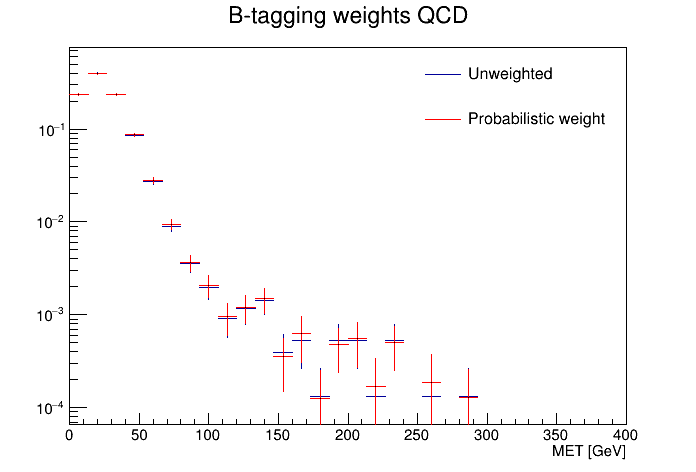

In [71]:
c2.Draw()